<a href="https://colab.research.google.com/github/m365i/hw-py-deep-learning/blob/main/OneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following guide in https://github.com/PeizeSun/OneNet

Using existing trained model "model_onenet_r50dcn.pth"  
  
taken from https://drive.google.com/drive/folders/1LnHMj7pkJhODeZTNHW-UcUZxybKbQmTB  

Prerequirements 

In [ ]:
%%capture
! pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
! pip install setuptools opencv-python pycocotools>=2.0.1 pyyaml==5.1

Install and build OneNet

In [ ]:
%%capture
! git clone https://github.com/PeizeSun/OneNet.git
%cd OneNet
! python setup.py build develop

Downlaod coco dataset  
taken from https://cocodataset.org/#download  
download only evaluation dataset if you have existing model  

In [ ]:
%%capture
! wget -P /content/coco -nc http://images.cocodataset.org/zips/val2017.zip
! unzip -q -n /content/coco/val2017.zip -d /content/coco

Visualize  
testing on some input images taken from coco dataset validation 2017  

In [ ]:
%%capture
! mkdir -p /content/coco/val2017_res
% cd /content/OneNet/
! ls
! python demo/demo.py \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --input /content/coco/val2017/00000000*.jpg \
    --output /content/coco/val2017_res \
    --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS \
    /content/drive/MyDrive/model_onenet_r50dcn.pth

Found 10 results


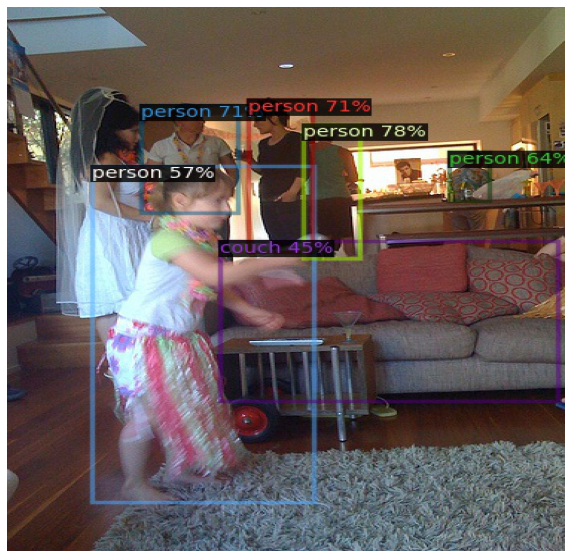

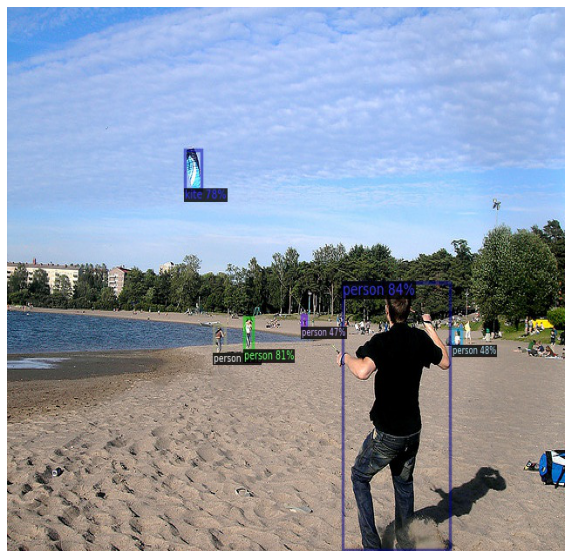

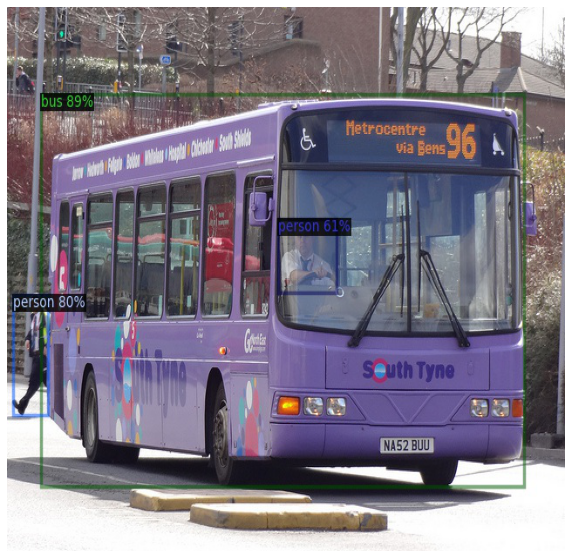

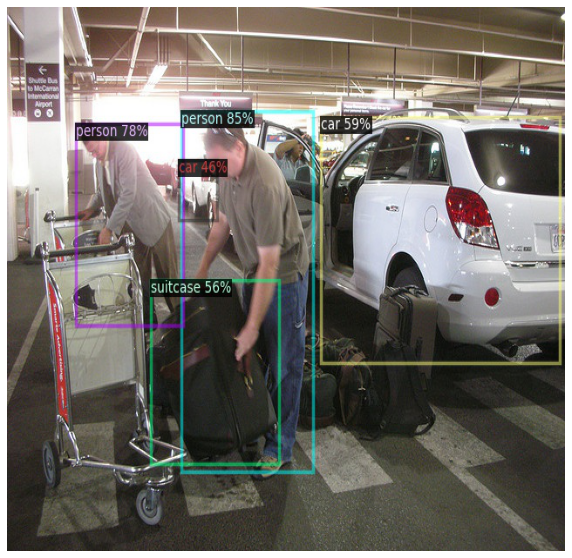

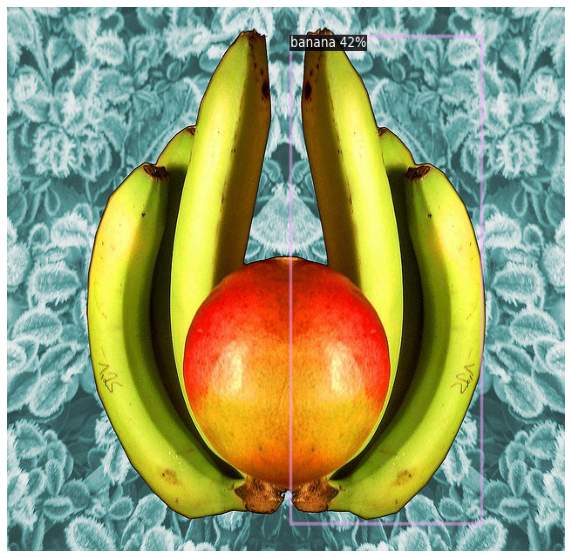

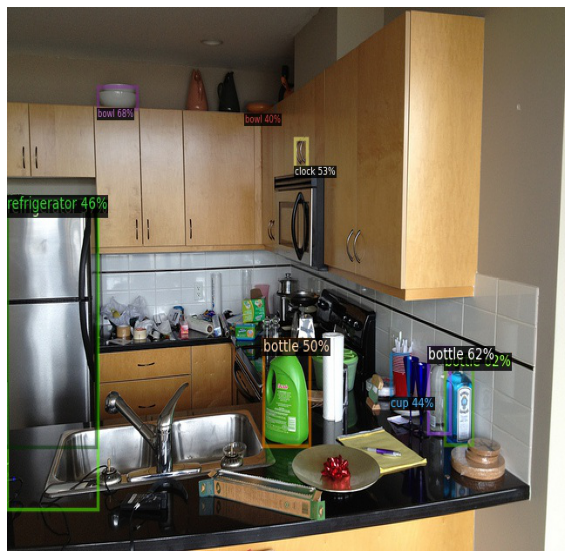

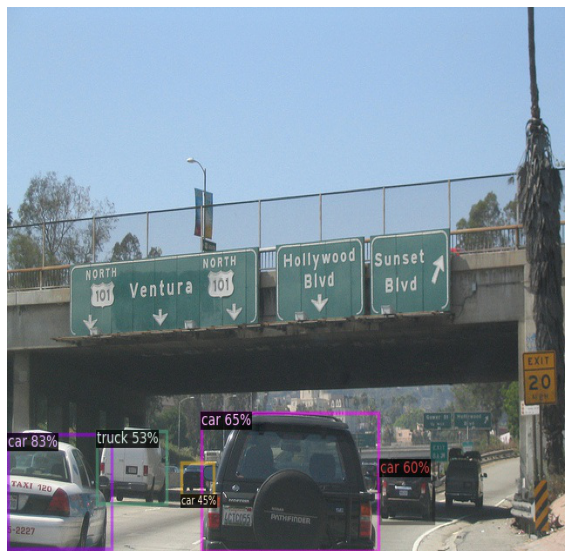

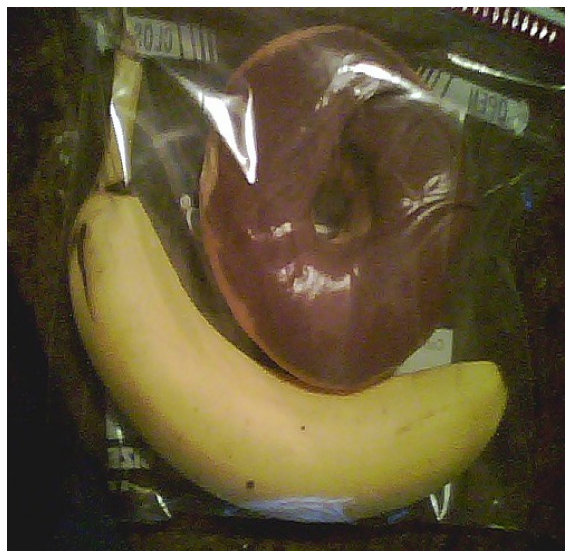

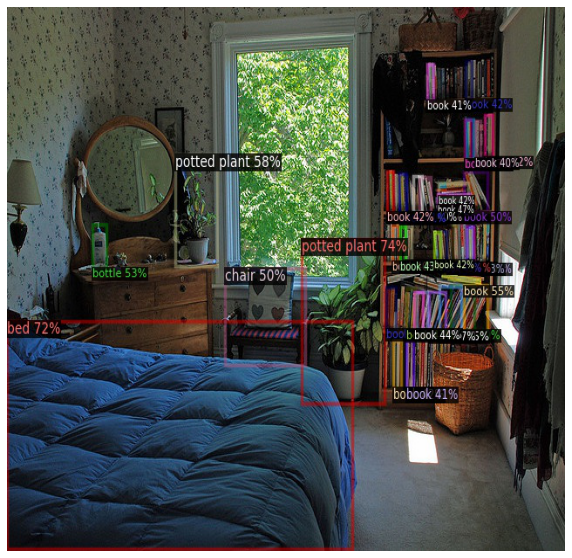

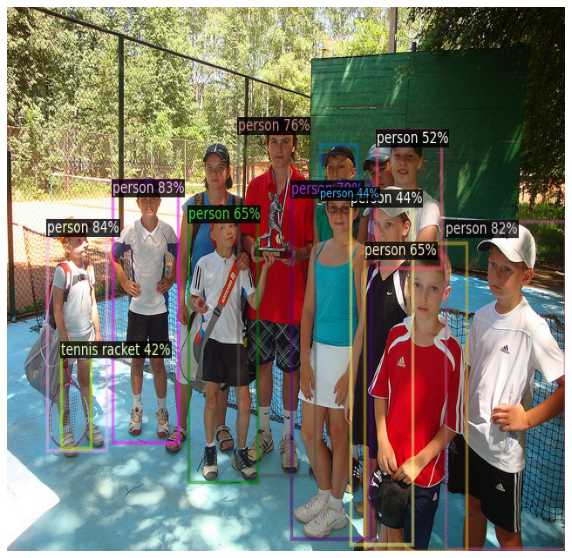

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import glob
import random

images = glob.glob("/content/coco/val2017_res/0000000*.jpg")
random.shuffle(images)
n = len(images)
n = min(10, n)
print("Found %s results" % n)
cols = 2
rows = n//cols
if rows == 0:
  print("No results found!")
else:
  for i in range(n):
    plt.figure(figsize = (10, 10))
    img = plt.imread(images[i])
    plt.imshow(img, aspect='auto')
    plt.axis('off')
    plt.show()